Spam Filter Classification Model

In [68]:
#core libraries
import matplotlib.pyplot as plt
import pandas as pd

#sklearn processing
from IPython.core.pylabtools import figsize
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold

#sklearn classification algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#visualization functions
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

#sklearn classification model evaluation functions
from sklearn import metrics

Data Collection

In [35]:
#Since the data is already processed , we just store the processed data into a csv file.
rf=pd.read_csv('spambase.data',header=None,delimiter=',')
rf.columns=['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet',
'word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000',
'word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet',
'word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts',
'word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
'word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','class']
rf.to_csv('SpamBase.csv',index=None)

Data Preperation

In [36]:
#Load the data
data=pd.read_csv("SpamBase.csv")

In [4]:
#Inspect Data

In [37]:
#Inspecting the column names
data.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [38]:
#inspecting the number of rows and columns
data.shape

(4601, 58)

In [43]:
#Having a look at the data
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [42]:
#Checking the data types of each feature
data.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [40]:
#Inspecting the range and spread of values of each feature
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


<ipython-input-116-c93394e02181>:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  data.hist(ax=ax)


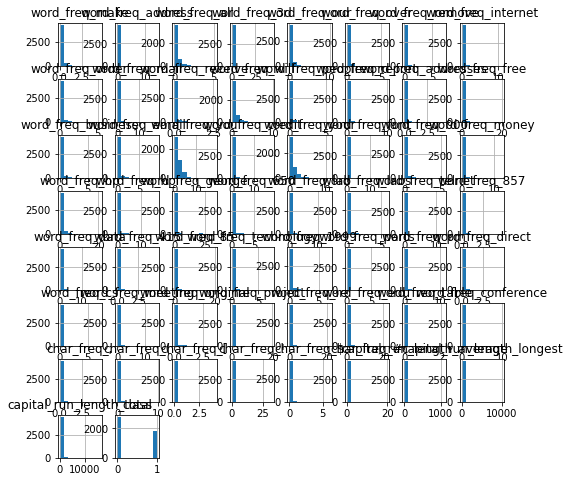

<Figure size 432x288 with 0 Axes>

In [116]:
#checking for null values
data.columns.isnull()
#Since there are no null values and the data type for each feature is sensible we go to the next step.
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
data.hist(ax=ax)
plt.show()

sns.histplot(x='class',data=data,ax=ax)
plt.tight_layout()

Data Modelling

In [44]:
#Splitting the dataset
#creating train -80% and test sets-20%
x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data['class'],test_size=0.2,random_state=0)
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
36,0.00,0.0,0.00,0.0,2.94,0.00,0.00,0.00,0.00,0.00,...,0.0,0.436,0.436,0.000,0.873,0.000,0.0,4.142,12,29
706,0.00,0.0,0.00,0.0,0.84,1.27,0.42,0.00,0.00,0.42,...,0.0,0.097,0.097,1.171,0.244,0.390,0.0,26.405,363,977
1559,0.32,0.0,0.80,0.0,0.80,0.32,0.16,0.00,0.64,0.00,...,0.0,0.000,0.050,0.000,0.050,0.075,0.0,1.419,15,159
1349,0.18,0.0,0.09,0.0,0.36,0.09,0.00,0.36,0.09,0.00,...,0.0,0.000,0.059,0.029,0.029,0.014,0.0,4.192,48,566
3878,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.13,0.00,...,0.0,0.125,0.438,0.146,0.000,0.000,0.0,3.657,35,534


In [45]:
#create validation set-25%
x_train,x_val,y_train,y_val=train_test_split(x_train,y_train,test_size=0.25,random_state=0)

In [13]:
x_train.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
438,0.00,0.00,0.00,0.0,1.31,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.251,0.000,1.007,0.000,0.0,1.440,8,36
321,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.67,0.0,0.67,...,0.0,0.170,0.511,0.085,0.511,0.000,0.0,4.617,27,217
448,0.12,0.12,0.24,0.0,1.34,0.12,0.0,0.12,0.0,0.00,...,0.0,0.061,0.020,0.000,0.041,0.041,0.0,2.351,69,254
4459,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.00,...,0.0,0.000,0.000,0.000,19.131,0.000,0.0,13.250,48,53
3500,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.0,1.96,...,0.0,0.000,0.373,0.000,0.000,0.000,0.0,1.857,11,26


In [101]:
#Inspecting the shape of test,train and validation set
print(x_test.shape,x_train.shape,x_val.shape)

(461, 57) (4140, 57) (920, 57)


In [47]:
#Mormalizing the data using Min Max scaler which will rescale the data so that all values will be in the range 0 and 1
#scaler=StandardScaler()
scaler2=MinMaxScaler()
#fit estimates the min and max values in the training data
scaler2.fit(x_train)
#transform normalises the data
x_train_scaled=scaler2.transform(x_train)
x_train_scaled=pd.DataFrame(x_train_scaled)
x_val_scaled=scaler2.transform(x_val)
x_val_scaled=pd.DataFrame(x_val_scaled)

Classification Models

Naive Bayes

In [48]:
classifier=GaussianNB()
classifier.fit(x_train_scaled,y_train)

GaussianNB()

In [49]:
y_pred=classifier.predict(x_val_scaled)

In [50]:
accuracy=metrics.accuracy_score(y_val,y_pred)
error=1-accuracy
precision=metrics.precision_score(y_val,y_pred,average=None)
recall=metrics.recall_score(y_val,y_pred,average=None)
F1_score=metrics.f1_score(y_val,y_pred,average=None)
print("Accuracy=",accuracy,"\nError=",error,"\nPrecision=",precision,"\nRecall=",recall,"\nF1 Score=",F1_score)

Accuracy= 0.8271739130434783 
Error= 0.17282608695652169 
Precision= [0.96926714 0.70623742] 
Recall= [0.73741007 0.96428571] 
F1 Score= [0.83758938 0.81533101]


Support Vector Machine

In [51]:
classifier=SVC(kernel='rbf',gamma='auto')
classifier.fit(x_train_scaled,y_train)

SVC(gamma='auto')

In [52]:
y_pred=classifier.predict(x_val_scaled)

In [53]:
accuracy=metrics.accuracy_score(y_val,y_pred)
error=1-accuracy
precision=metrics.precision_score(y_val,y_pred,average=None)
recall=metrics.recall_score(y_val,y_pred,average=None)
F1_score=metrics.f1_score(y_val,y_pred,average=None)
print("Accuracy=",accuracy,"\nError=",error,"\nPrecision=",precision,"\nRecall=",recall,"\nF1 Score=",F1_score)

Accuracy= 0.7706521739130435 
Error= 0.22934782608695647 
Precision= [0.73216689 0.93220339] 
Recall= [0.97841727 0.4532967 ] 
F1 Score= [0.83756736 0.60998152]


Decision Tree classifier

In [54]:
classifier=DecisionTreeClassifier(criterion="entropy",random_state=0)
classifier.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
y_pred=classifier.predict(x_val_scaled)

In [56]:
accuracy=metrics.accuracy_score(y_val,y_pred)
error=1-accuracy
precision=metrics.precision_score(y_val,y_pred,average=None)
recall=metrics.recall_score(y_val,y_pred,average=None)
F1_score=metrics.f1_score(y_val,y_pred,average=None)
print("Accuracy=",accuracy,"\nError=",error,"\nPrecision=",precision,"\nRecall=",recall,"\nF1 Score=",F1_score)

Accuracy= 0.908695652173913 
Error= 0.09130434782608698 
Precision= [0.91992883 0.89106145] 
Recall= [0.92985612 0.87637363] 
F1 Score= [0.92486583 0.88365651]


k Nearest Neighbors

In [57]:
k_classifier=KNeighborsClassifier(n_neighbors=8,weights='distance')
k_classifier.fit(x_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=8, weights='distance')

In [58]:
y_pred=k_classifier.predict(x_val_scaled)

In [59]:
accuracy=metrics.accuracy_score(y_val,y_pred)
error=1-accuracy
precision=metrics.precision_score(y_val,y_pred,average=None)
recall=metrics.recall_score(y_val,y_pred,average=None)
F1_score=metrics.f1_score(y_val,y_pred,average=None)
print("Accuracy=",accuracy,"\nError=",error,"\nPrecision=",precision,"\nRecall=",recall,"\nF1 Score=",F1_score)
#Selection of optimal value of K

Accuracy= 0.9130434782608695 
Error= 0.08695652173913049 
Precision= [0.91608392 0.90804598] 
Recall= [0.94244604 0.86813187] 
F1 Score= [0.92907801 0.88764045]


In [60]:
for i in range(1,30):
    classifier=KNeighborsClassifier(n_neighbors=i,weights='distance')
    classifier.fit(x_train_scaled,y_train)
    y_pred=classifier.predict(x_val_scaled)
    accuracy=metrics.accuracy_score(y_val,y_pred)
    error=1-accuracy
    precision=metrics.precision_score(y_val,y_pred,average=None)
    recall=metrics.recall_score(y_val,y_pred,average=None)
    F1_score=metrics.f1_score(y_val,y_pred,average=None)
    print(i,"Accuracy=",accuracy,"\nError=",error,"\nPrecision=",precision,"\nRecall=",recall,"\nF1 Score=",F1_score,'\n')

1 Accuracy= 0.9043478260869565 
Error= 0.09565217391304348 
Precision= [0.90909091 0.89655172] 
Recall= [0.9352518  0.85714286] 
F1 Score= [0.92198582 0.87640449] 

2 Accuracy= 0.9043478260869565 
Error= 0.09565217391304348 
Precision= [0.90909091 0.89655172] 
Recall= [0.9352518  0.85714286] 
F1 Score= [0.92198582 0.87640449] 

3 Accuracy= 0.908695652173913 
Error= 0.09130434782608698 
Precision= [0.91549296 0.89772727] 
Recall= [0.9352518  0.86813187] 
F1 Score= [0.9252669  0.88268156] 

4 Accuracy= 0.9130434782608695 
Error= 0.08695652173913049 
Precision= [0.91608392 0.90804598] 
Recall= [0.94244604 0.86813187] 
F1 Score= [0.92907801 0.88764045] 

5 Accuracy= 0.9097826086956522 
Error= 0.0902173913043478 
Precision= [0.91710758 0.898017  ] 
Recall= [0.9352518  0.87087912] 
F1 Score= [0.92609083 0.88423989] 

6 Accuracy= 0.9141304347826087 
Error= 0.08586956521739131 
Precision= [0.91768827 0.90830946] 
Recall= [0.94244604 0.87087912] 
F1 Score= [0.9299024  0.88920056] 

7 Accuracy= 

Best Performing Model k Nearest Neighbors -k=8

In [61]:
x=data.iloc[:,:-1]
y=data['class']

In [62]:
x.shape,y.shape

((4601, 57), (4601,))

In [63]:
kcv=KFold(n_splits=10,shuffle=True)
model=KNeighborsClassifier(n_neighbors=8,weights='distance')

In [64]:
sum=0
k=10
ilist=[]
falsepoitivelist=[]
falsenegativelist=[]
errorratelist=[]
accuracylist=[]
for i in range(1,k+1):
    result=next(kcv.split(x),None)
    x_train=x.iloc[result[0]]
    x_test=x.iloc[result[1]]
    y_train=y.iloc[result[0]]
    y_test=y.iloc[result[1]]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    conf_matrix=metrics.confusion_matrix(y_test,y_pred)
    fp=conf_matrix[0][1]
    fn=conf_matrix[1][0]
    tn=conf_matrix[0][0]
    tp=conf_matrix[1][1]
    fpr=(fp/(fp+tn))
    fnr=(fn/(fn+tp))
    err=((fp+fn)/(tp+tn+fp+fn))
    sum=sum+err
    ilist.append(i)
    falsepoitivelist.append(fpr)
    falsenegativelist.append(fnr)
    errorratelist.append(err)
    accuracylist.append(metrics.accuracy_score(y_test,y_pred))

Results

In [65]:
import numpy as np
ilist.append("Average")
falsepoitivelist.append(np.mean(falsepoitivelist))
falsenegativelist.append(np.mean(falsenegativelist))
errorratelist.append(np.mean(err))
accuracylist.append(np.mean(accuracylist))
from tabulate import tabulate
from IPython.display import display
df=pd.DataFrame({"Fold Number":ilist,"False Positive Rate":falsepoitivelist,"False Negative Rate":falsenegativelist,"Error Rate":errorratelist,"Accuracy":accuracylist})
df.set_index(["Fold Number"],inplace=True)
#display(df)
print(tabulate(df,headers='keys',tablefmt='psql'))

+---------------+-----------------------+-----------------------+--------------+------------+
| Fold Number   |   False Positive Rate |   False Negative Rate |   Error Rate |   Accuracy |
|---------------+-----------------------+-----------------------+--------------+------------|
| 1             |              0.113553 |              0.207447 |     0.151844 |   0.848156 |
| 2             |              0.15     |              0.180124 |     0.160521 |   0.839479 |
| 3             |              0.163194 |              0.202312 |     0.177874 |   0.822126 |
| 4             |              0.164912 |              0.198864 |     0.177874 |   0.822126 |
| 5             |              0.126354 |              0.163043 |     0.140998 |   0.859002 |
| 6             |              0.167857 |              0.243094 |     0.197397 |   0.802603 |
| 7             |              0.137037 |              0.26178  |     0.18872  |   0.81128  |
| 8             |              0.114865 |              0.248